# Visualizing neuronal data

## Tuning curves

The file `auditory_RN.npz` contains local-field potential recordings from the auditory nerve of the fruit fly in response to a pure tone presented at 12 different intensities, 32 trials per intensity.

1. Plot stimulus intensity vs. the single-trial responses.
2. Plot stimulus intensity vs. the trial-averaged response with error bars.

(12,) (12, 32)


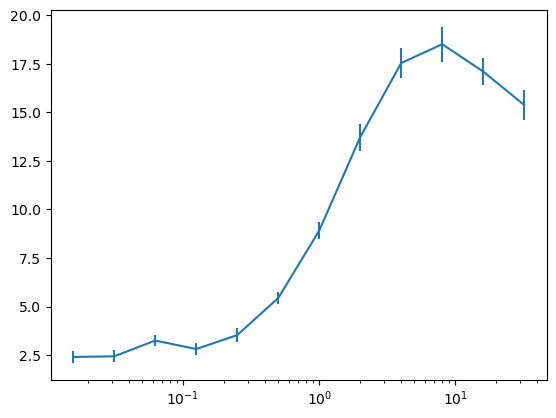

In [31]:
# your solution here
import numpy as np
import matplotlib.pyplot as plt

d = np.load('auditory_RN.npz')
print(d['intensities'].shape, d['trials'].shape)

avg = np.mean(d['trials'], axis=1)
sem = np.std(d['trials'], axis=1) / np.sqrt(32)

plt.errorbar(d['intensities'], avg, sem)
plt.xscale('log')
plt.show()



## Time-varying firing rates
The file `two_neurons.npz` contains the voltage trace of two different neurons. Each neuron was stimulated with a current pulse (5nA) that started at 150ms into the recording and lasted 1100ms.

1. Plot the voltage traces as a function of time. What is the difference between the neurons?
2. Visualize the firing pattern of the neurons using a PSTH. Choose bin positions that allow you to see when both neurons fire.

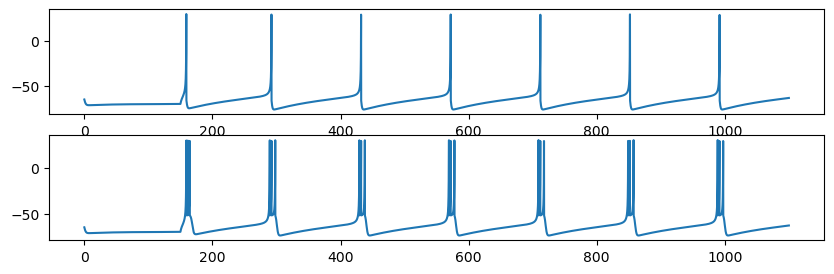

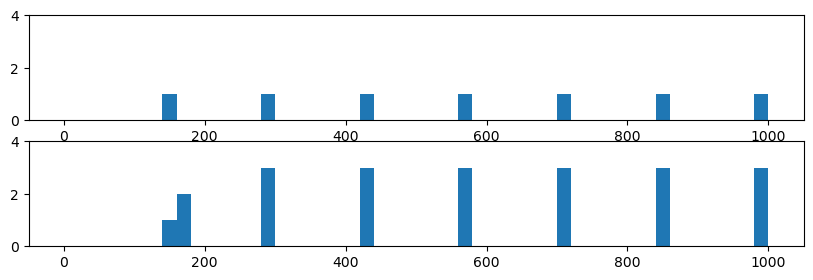

In [46]:
# your solution here
d = np.load('two_neurons.npz')

plt.figure(figsize=(10, 3))
plt.subplot(211)
plt.plot(d['time'], d['voltage1'])
plt.subplot(212)
plt.plot(d['time'], d['voltage2'])

plt.figure(figsize=(10, 3))
plt.subplot(211)
plt.hist(d['spike_times1'], bins=range(0, 1005, 20))
plt.ylim(0, 4)
plt.subplot(212)
plt.hist(d['spike_times2'], bins=range(0, 1005, 20))
plt.ylim(0, 4)
plt.show()



## Inter-spike intervals
Using the data from the file `two_neurons.npz`, compute inter-spike intervals (ISI, time between subsequent times) for each neuron and visualize the ISI distributions with histograms.

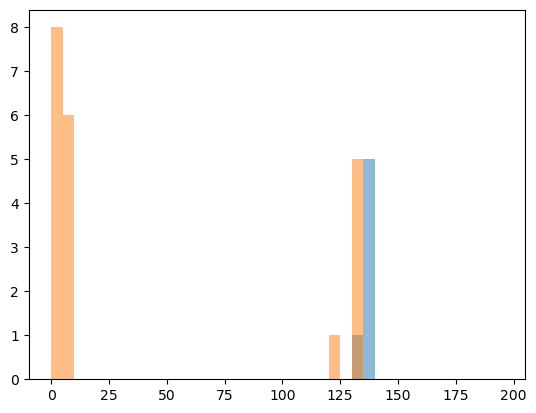

(0.0, 200.0)

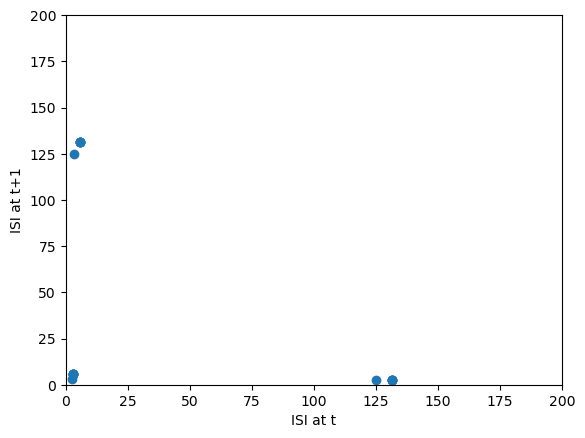

In [76]:
# your solution here
st1 = d['spike_times1']
st2 = d['spike_times2']

isi1 = np.diff(st1)
isi2 = np.diff(st2)

plt.hist(isi1, bins=np.arange(0, 200, 5), alpha=0.5)
plt.hist(isi2, bins=np.arange(0, 200, 5), alpha=0.5)
plt.show()

plt.plot(isi2[:-1], isi2[1:], 'o')
plt.xlabel('ISI at t')
plt.ylabel('ISI at t+1')
plt.xlim(0, 200)
plt.ylim(0, 200)

## Overlaying spatial behavioral data and neuronal spike times
The file `mouse_tracks.npz` contains data from an experiment in which a mouse was allowed to move in a circular arena while neurons in hippocampus were recorded. The file contains the walking trajectories (x,y position in tracks) and the spike times from two neurons. Both neurons are place cells, which fire only when the mouse is in a specific location in the arena.

1. Plot the walking trajectories (x,y positions).
2. Plot the location the mouse was in for each spike of the two neurons (use different colors for the different neurons).  

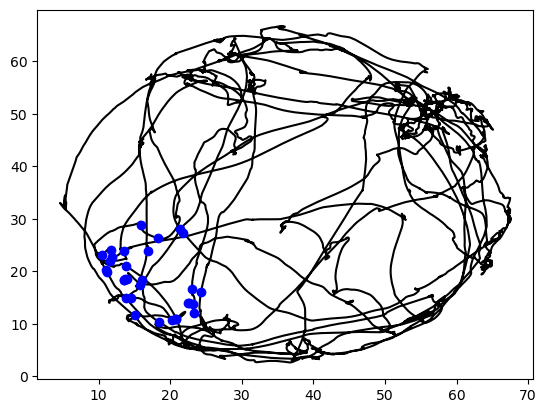

In [61]:
# your solution here
import numpy as np
import matplotlib.pyplot as plt

d = np.load('mouse_tracks.npz')

# solution 1
pos2 = np.zeros((len(d['spike_times2']), 2))

for tidx in range(len(d['spike_times2'])):
    t = d['spike_times2'][tidx]
    idx = np.where(d['times']==t)
    pos2[tidx, :] = d['tracks'][idx, :]

plt.plot(d['tracks'][:, 0], d['tracks'][:, 1], 'k')
plt.plot(x1, y1, 'o', color="b")
